In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

In [3]:
def split(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    size = len(dataset)
    train_dataset = dataset.take(int(TRAIN_RATIO*size))

    val_test_dataset = dataset.skip(int(TRAIN_RATIO*size))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*size))

    test_dataset = val_test_dataset.skip(int(VAL_RATIO*size))
    return train_dataset,val_dataset,test_dataset
    

In [4]:
TRAIN_RATIO=0.6
VAL_RATIO=0.2
TEST_RATIO=0.2
# dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = split(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

DATA VISUALIZATION

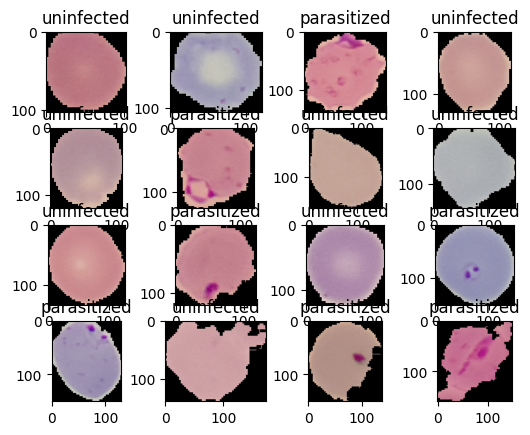

In [5]:
for i,(image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))

DATA PREPARATION

In [9]:
IM_SIZE = 224
def resize_rescale(image,label):
    return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255,label

In [10]:
train_dataset = train_dataset.map(resizing)

In [11]:
for image,label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [12]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)